### Necessary Imports

In [2]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Data

In [3]:
traindf=pd.read_csv("./data/train.csv")

C:\Users\krish\AppData\Local\Temp\ipykernel_20256\2170988650.py:1: DtypeWarning: Columns (4,13,14,16,47) have mixed types. Specify dtype option on import or set low_memory=False.
  traindf=pd.read_csv("./data/train.csv")


In [4]:
testdf = pd.read_csv("./data/test.csv")

C:\Users\krish\AppData\Local\Temp\ipykernel_20256\811105806.py:1: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  testdf = pd.read_csv("./data/test.csv")


In [5]:
validationdf = pd.read_csv("./data/validation.csv")

C:\Users\krish\AppData\Local\Temp\ipykernel_20256\3722391647.py:1: DtypeWarning: Columns (13,16,36) have mixed types. Specify dtype option on import or set low_memory=False.
  validationdf = pd.read_csv("./data/validation.csv")


### Data Cleaning

In [6]:
traindf.replace('\\N', None, inplace=True)

# dropping values that are not neeeded
df=traindf.drop(['time_x', 'timetaken_in_millisec', 'fastestLap', 'rank', 'fastestLapTime', 'max_speed', 'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date'
            , 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'driver_num', 'driver_code', 'url_y'
             ,"number", "position_x", 'nationality_y', 'url', 'status', 'positionText_y', 'constructorRef', 'forename', 'surname', 'driverRef', 'positionText_x', 'nationality'], axis=1)


#converting the dob and date column into years to determine the age of the driver
df['dob'] = pd.to_datetime(df['dob'])
df['date'] = pd.to_datetime(df['date'])
df['time_difference'] = df['date'] - df['dob']
df['years'] = (df['time_difference'].dt.days / 365.25).astype(int)

df = df.drop(['dob', 'date', 'time_difference'], axis=1)

# using frequency encoding for grand_prix and company
frequency_grand_prix = df['grand_prix'].value_counts(normalize=True)
df['grand_prix_encoded'] = df['grand_prix'].map(frequency_grand_prix)

frequency_company = df['company'].value_counts(normalize=True)
df['company_encoded'] = df['company'].map(frequency_company)

df = df.drop(['grand_prix', 'company'], axis=1)


In [7]:
testdf.replace('\\N', None, inplace=True)

# dropping values that are not neeeded
df1=testdf.drop(['time_x', 'timetaken_in_millisec', 'fastestLap', 'rank', 'fastestLapTime', 'max_speed', 'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date'
            , 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'driver_num', 'driver_code', 'url_y'
             ,"number", "position_x", 'nationality_y', 'url', 'status', 'constructorRef', 'forename', 'surname', 'driverRef', 'positionText_x', 'nationality'], axis=1)


#converting the dob and date column into years to determine the age of the driver
df1['dob'] = pd.to_datetime(df1['dob'])
df1['date'] = pd.to_datetime(df1['date'])
df1['time_difference'] = df1['date'] - df1['dob']
df1['years'] = (df1['time_difference'].dt.days / 365.25).astype(int)

df1 = df1.drop(['dob', 'date', 'time_difference'], axis=1)

# using frequency encoding for grand_prix and company
frequency_grand_prix = df1['grand_prix'].value_counts(normalize=True)
df1['grand_prix_encoded'] = df1['grand_prix'].map(frequency_grand_prix)

frequency_company = df1['company'].value_counts(normalize=True)
df1['company_encoded'] = df1['company'].map(frequency_company)

df1 = df1.drop(['grand_prix', 'company'], axis=1)


C:\Users\krish\AppData\Local\Temp\ipykernel_20256\3737627441.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['dob'] = pd.to_datetime(df1['dob'])
C:\Users\krish\AppData\Local\Temp\ipykernel_20256\3737627441.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['date'] = pd.to_datetime(df1['date'])


In [8]:
validationdf.replace('\\N', None, inplace=True)

# dropping values that are not neeeded
df2=validationdf.drop(['time_x', 'timetaken_in_millisec', 'fastestLap', 'rank', 'fastestLapTime', 'max_speed', 'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date'
            , 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'driver_num', 'driver_code', 'url_y'
             ,"number", "position_x", 'nationality_y', 'url', 'status', 'positionText_y', 'constructorRef', 'forename', 'surname', 'driverRef', 'positionText_x', 'nationality'], axis=1)


#converting the dob and date column into years to determine the age of the driver
df2['dob'] = pd.to_datetime(df2['dob'])
df2['date'] = pd.to_datetime(df2['date'])
df2['time_difference'] = df2['date'] - df2['dob']
df2['years'] = (df2['time_difference'].dt.days / 365.25).astype(int)

df2 = df2.drop(['dob', 'date', 'time_difference'], axis=1)

# using frequency encoding for grand_prix and company
frequency_grand_prix = df2['grand_prix'].value_counts(normalize=True)
df2['grand_prix_encoded'] = df2['grand_prix'].map(frequency_grand_prix)

frequency_company = df2['company'].value_counts(normalize=True)
df2['company_encoded'] = df2['company'].map(frequency_company)

df2 = df2.drop(['grand_prix', 'company'], axis=1)


### Heatmaps

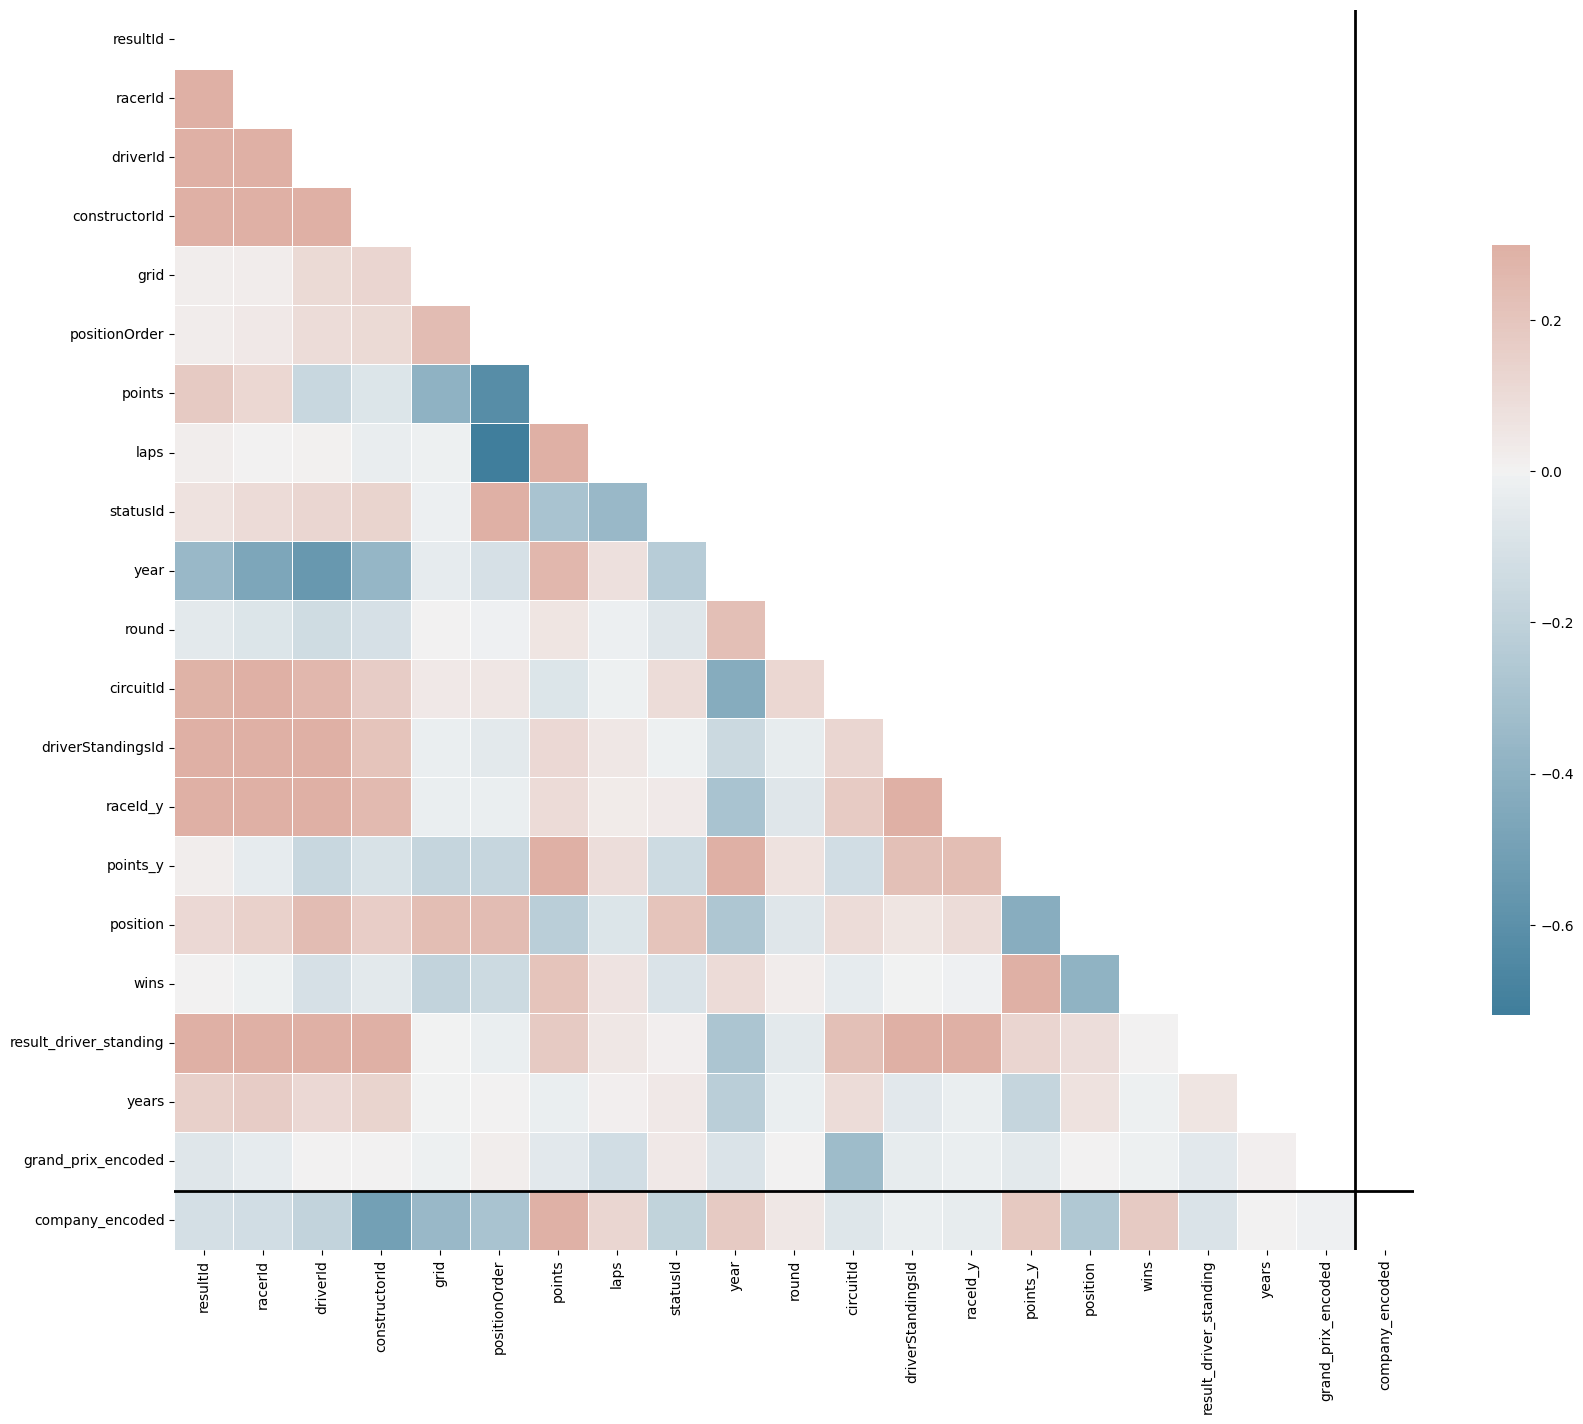

In [9]:
corr_matrix = df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"fontsize": 12})

ax.axvline(x=20, ymin=0, ymax=1, color='black', linewidth=2)
ax.axhline(y=20, xmin=0, xmax=1, color='black', linewidth=2)

Since `grand_prix_encoded` isn't helping much here as a feature, we will drop it.

In [25]:
df = df.drop(['grand_prix_encoded'], axis=1)
df1 = df1.drop(['grand_prix_encoded'], axis=1)
df2 = df2.drop(['grand_prix_encoded'], axis=1)

### Training Parameters

In [10]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 80,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'device': 'gpu'
}

In [11]:
X_train = df.drop(columns=['position'])
y_train = df['position']

X_test = df2.drop(columns=['position'])
y_test = df2['position']

predictkardo = df1
predictkardo

,resultId,racerId,driverId,constructorId,grid,positionOrder,points,laps,statusId,year,round,circuitId,driverStandingsId,raceId_y,points_y,wins,result_driver_standing,years,grand_prix_encoded,company_encoded
0,23949,997,4,1,13,8,4.0,70,11,2018,9,70,12474,93,16.0,0,298739826,36,0.051665,0.08897
1,23949,997,4,1,13,8,4.0,70,11,2018,9,70,12494,94,21.0,0,299218806,36,0.051665,0.08897
2,23949,997,4,1,13,8,4.0,70,11,2018,9,70,12514,95,21.0,0,299697786,36,0.051665,0.08897
3,23949,997,4,1,13,8,4.0,70,11,2018,9,70,12534,96,25.0,0,300176766,36,0.051665,0.08897
4,23949,997,4,1,13,8,4.0,70,11,2018,9,70,12554,97,25.0,0,300655746,36,0.051665,0.08897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352923,26085,1110,857,1,5,20,0.0,0,130,2023,12,13,72085,1106,5.0,0,1880337225,22,0.056827,0.08897
352924,26085,1110,857,1,5,20,0.0,0,130,2023,12,13,72125,1107,5.0,0,1881380625,22,0.056827,0.08897
352925,26085,1110,857,1,5,20,0.0,0,130,2023,12,13,72145,1108,17.0,0,1881902325,22,0.056827,0.08897
352926,26085,1110,857,1,5,20,0.0,0,130,2023,12,13,72165,1109,27.0,0,1882424025,22,0.056827,0.08897


### Dataset Training

In [12]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Train the model
num_round = 3000
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2725
[LightGBM] [Info] Number of data points in the train set: 2830101, number of used features: 20


### Model Prediction

In [23]:
# Predict on the test set
# y_pred = bst.predict(predictkardo, num_iteration=bst.best_iteration)

# Predict on the validation set
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

### Validation Dataset evaluation

In [24]:
# Evaluate the model for validation set
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 1.8320613579920244
R²: 0.9042850537733543


c:\Users\krish\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Saving model and submission.csv

In [16]:
# Optionally, save the model
# bst.save_model('lightgbm_model.txt')

# Print sample predictions
predictions_df = predictkardo.copy()
# predictions_df['actual_position'] = y_test
predictions_df['position'] = y_pred
# predictions_df
submissions = predictions_df[['position', 'result_driver_standing']]
print(submissions)
submissions.to_csv('submission.csv', index=False)
# predictions_df

         position  result_driver_standing
0        4.690201               298739826
1        4.998730               299218806
2        5.996404               299697786
3        4.773196               300176766
4        5.193063               300655746
...           ...                     ...
352923  13.830921              1880337225
352924  13.830921              1881380625
352925   8.472371              1881902325
352926   8.074246              1882424025
352927   8.407086              1882971810

[352928 rows x 2 columns]
